# Final project

## Group 32: Xuan Hong 60135167

**Table of contents:**
1. Purpose
    * Background and questions
    * Executive summary
2. Processing the raw data
    * Droping extra information
    * Applying the year and month column
    * Introducing the data
3. Data analysis
    * The average of snow depth in 1935-2015 by month
    * The average of snow depth in 1935-2015 with 2017: the largest snow depth year
    * The average of snow water equivalent in 1935-2015 with 2017
    * The first order linear regression of the snow water equivalent in 1935-2015 with 2017
    * The second order linear regression of the snow water equivalent in 1935-2015 with 2017
4. Conclusion

## 1. Purpose

### Background and questions

Last year, a large amount of snowfall attacked Vancouver and caused many inconvenient situations including traffic and electric. [Global News](https://globalnews.ca/news/3230587/b-c-snowfall-records-smashed-this-weekend-as-snow-blankets-province/) reported that the daily snow amount on Feburary.5th is 12cm, which breaks the record in 1946(10.7cm). [CBC](http://www.cbc.ca/news/canada/british-columbia/when-vancouver-had-winter-1.3918910) also pointed out that Vancouver is in its longest winter cold snap since 1986. The concern of the climate change was hotly debated in that winter. 

In order to study the unusual snowfall, I would use two datasets including the **"All manual snow survey data in 1935-2015"** and **"2017 manual snow survey data"** form British Columbia Data Catalogue: [Manual Snow Survey Observations Data Archive](https://catalogue.data.gov.bc.ca/dataset/manual-snow-survey-observations-data-archive). The 2017 data would be used when calculating the manual average snow depth, average snow water equivalent and doing the linear regression.

Since the dataset contains all the record of **British Columbia**, it will be slightly different from just focusing on Metro Vancouver.

The questions:
1. Which month has the largest amount of snowfall during the winter?
2. Which year has the largest amount of snowfall? What is the effect?
3. What is the current trend? Is the snowfall amount actually increasing recently?
4. From a historical persective, is the increasing of snowfall in last year normal?

### Executive summary

1. March has the largest amount of snowfall.
2. In 1999, BC has the largest amount of snowball as 165.404372cm in average. It is a well known bizzard called ["North American blizzard of 1999"](https://en.wikipedia.org/wiki/North_American_blizzard_of_1999).
3. The current trend of BC snowfall is actually decreasing since 2012, and the snowfall of 2017 is slightly above the average. 
4. The average snow water equivalent by year follows the linear regression equation: $y = -3.26060771 \times 10^5 + 3.29722654 \times 10^2 \cdot x - 8.32380889 \times 10^{-2} \cdot x^2$
5. The general trend of the snowfall is decreassing since 1970s.

## 2. Processing raw data

In [1]:
import pandas as pd
import numpy as np
import scipy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('1935-2015 snow.csv')

In [3]:
snow_2017 = pd.read_csv('2017 snow.csv')

The `data` is the main researching dataset I would use. It contains the snowfall information from 1935 to 2015 in British Columbia. In order to compare with the snowfall in 2017, I also import the `snow_2017`, which includes the 2017 snowfall information in British Columbia.

### Droping extra information

In [4]:
data.head()

,Snow_Course_Name,Number,Elevation_metres,Date_of_Survey,Snow_Depth_cm,Water_Equiv_mm,Survey_Code,percent_Normal,Density_pecent,Survey_Period,Normal_mm
0,GERRARD,2D01,1620.0,3/22/1935,152.0,389.0,B,NaN,26.0,April_1,NaN
1,COQUITLAM LAKE,1D01,300.0,3/23/1935,3.0,3.0,B,0.0,10.0,April_1,1272.0
2,TROUT CREEK,2F01,1428.0,3/28/1935,91.0,246.0,NaN,153.0,27.0,April_1,161.0
3,SUMMERLAND RESERVOIR,2F02,1304.0,3/30/1935,94.0,259.0,NaN,131.0,28.0,April_1,197.0
4,GRAYSTOKE LAKE,2F04,1818.0,4/3/1935,122.0,320.0,NaN,94.0,26.0,April_1,339.0


The data head shows that the data contains three usless columns **'Number'**(representing the snow course number), **'Survey_Code'** (representing the survey number), and **'Survey_Period'**(representing the survey period), so we drop these extra information.

In [5]:
data.drop(['Number','Survey_Code','Survey_Period'], axis = 1, inplace = True)

### Applying the year and month column

We can define two function `year` and `month` to get the exact year and month of each snowfall, and apply them to be the new columns.

In [6]:
def year(text):
    return int(text[::-1][0:4][::-1])

In [7]:
data['year'] = data['Date_of_Survey'].apply(year)

In [8]:
def month(text):
    return int(text[0])

In [9]:
data['month'] = data['Date_of_Survey'].apply(month)

### Introducing the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56271 entries, 0 to 56270
Data columns (total 10 columns):
Snow_Course_Name    56271 non-null object
Elevation_metres    56204 non-null float64
Date_of_Survey      56271 non-null object
Snow_Depth_cm       54054 non-null float64
Water_Equiv_mm      54062 non-null float64
percent_Normal      51567 non-null float64
Density_pecent      49821 non-null float64
Normal_mm           51567 non-null float64
year                56271 non-null int64
month               56271 non-null int64
dtypes: float64(6), int64(2), object(2)
memory usage: 4.3+ MB


The data information shows that there are 56271 entries of data and 10 columns. Each row represents the snowfall informaion of a snow course at that current time. The columns are as follows:

* **Snow_Course_Name** : The name of the snow course.
* **Elevation_metres** : The altitude of the snow course.
* **Date_of_Survey** : The exact date of each snowfall including yaer, month, and day.
* **Snow_Depth_cm** : The snow depth in cm of each snowfall.
* **Water_Equiv_mm** : The snow water equivalent in mm of each snowfall.
* **percent_Normal** : The percantage rate of water equivalent and the normal water equivalent of each snowfall.
* **Density_percent** : The density of each snowfall in percantage. It is calculated by the formula [snow in kilogram] $\div$ [cube meters].
* **Normal_mm** : The normal snow water equivalent in mm of each snowfall.
* **year** : The year of each snowfall.
* **month** : The month of each snowfall.

## 3. Data analysis

### The average of snow depth in 1935-2015 by month

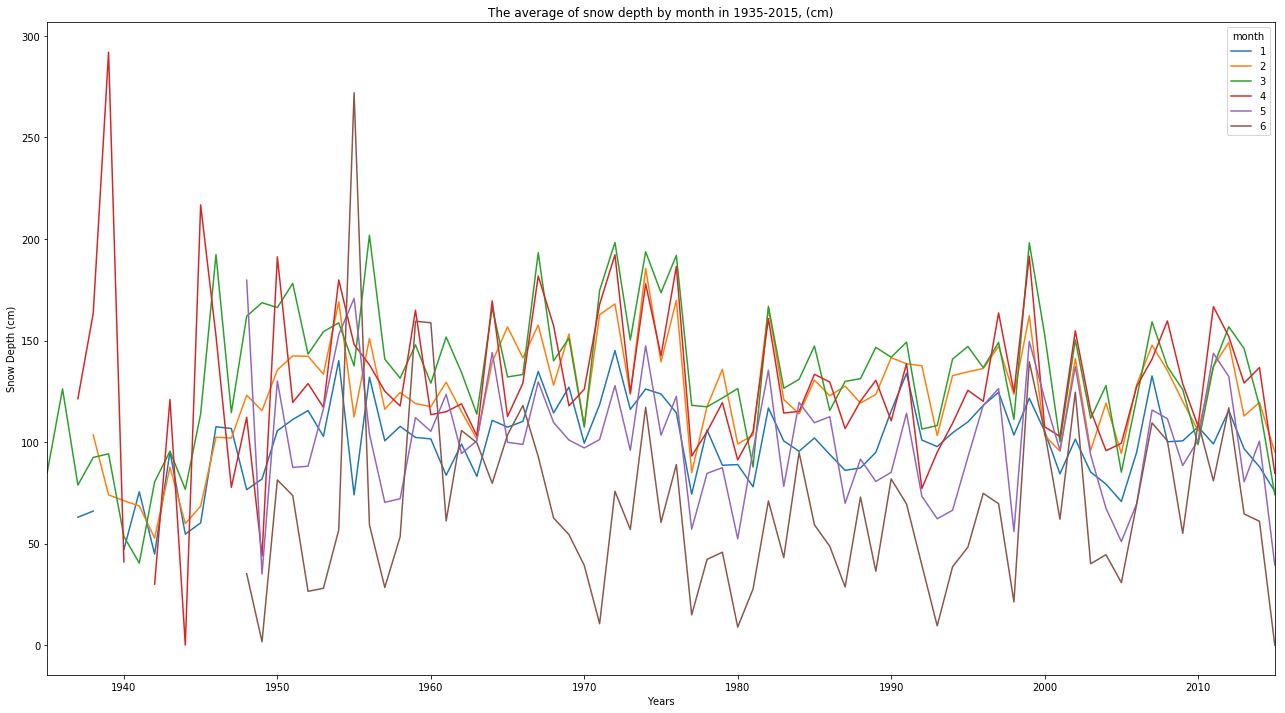

In [11]:
snow_month = data.groupby(['year','month'])['Snow_Depth_cm'].mean().unstack('month')
snow_month.plot(kind='line', figsize=(22,12))
plt.title('The average of snow depth by month in 1935-2015, (cm)')
plt.xlabel('Years')
plt.ylabel('Snow Depth (cm)')
plt.show()

Ignoring some outlier before 1960, March has the largest amount of snowfall in BC. It is resonable when we considering the Northern BC and the Rocky mountains. These places have a longer winter.

### The average of snow depth in 1935-2015 with 2017 : the largest snow depth year

First, we use the dataset `snow_2017` to calculate the average snow deepth in 2017, then we apply it to the series of the main dataset, and plot the graph.

In [12]:
snow_deepth_2017 = snow_2017.ix[:, 4].mean()
snow_deepth_2017

120.01636904761905

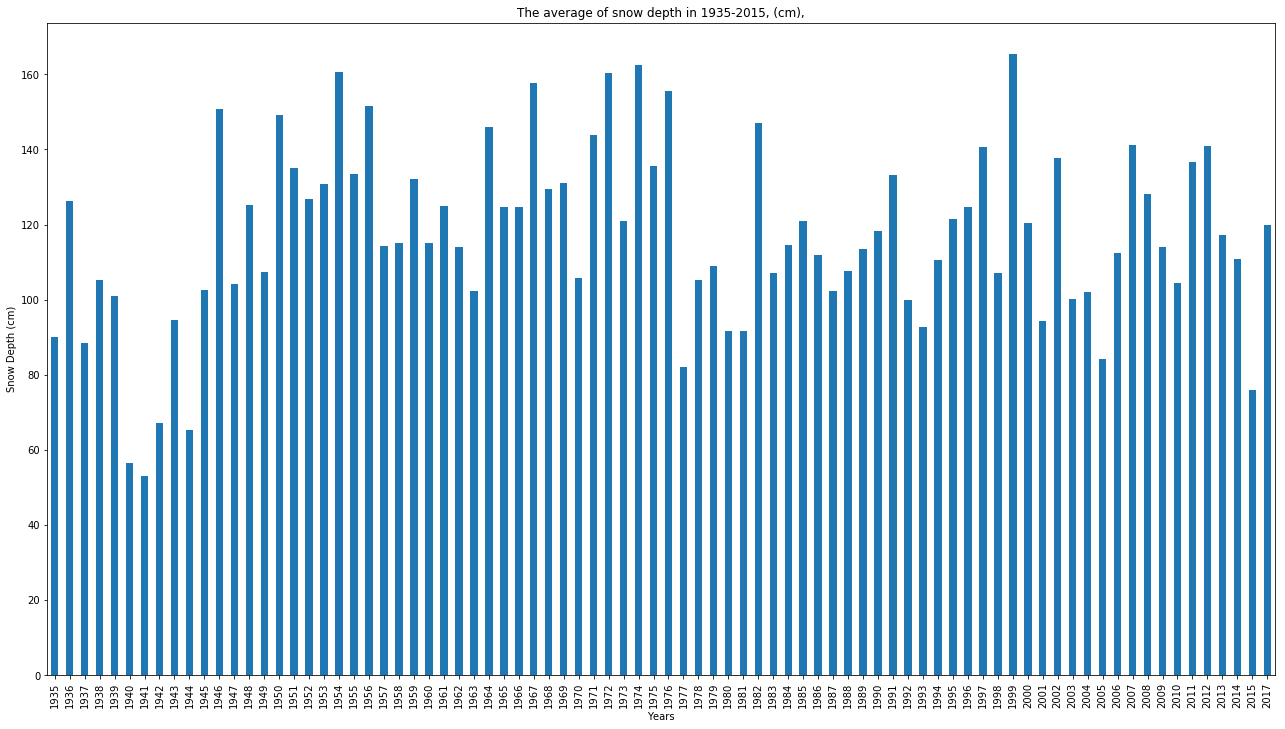

In [13]:
snow_year = data.groupby('year')['Snow_Depth_cm'].mean()
snow_year = snow_year.append(pd.Series([snow_deepth_2017],index=[2017]))
snow_year.plot(kind='bar', figsize=(22,12))
plt.title('The average of snow depth in 1935-2015, (cm),')
plt.xlabel('Years')
plt.ylabel('Snow Depth (cm)')
plt.show()

According to the graph, BC has the largest amount of snow depth about 165.404372cm in 1999. The bizzard is called ["North American blizzard of 1999"](https://en.wikipedia.org/wiki/North_American_blizzard_of_1999), which mainly effected the Midwestern United States and portions of central and eastern Canada. It dumped as much as 60 cm (2 feet) of snow in many areas. Although BC is a western Canada province, it still be influenced. Here is the picture of that bizzard: ![snow bizzard](https://www.blogto.com/upload/2010/12/20101229-blizzard1999.jpg)

### The average of snow water equivalent in 1935-2015 with 2017

To study the trend of the snowfall, it would be more efficient to use the **snow water equivalent** rather than the snow depth. Here is the introduction of the [water equivalent](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/or/snow/?cid=nrcs142p2_046155). It is related to the snow depth by the formula: [Snow Water Equivalent] $\div$ [Snow Density] = [Snow Depth]

Similar to the snow depth graph, we first use the dataset `snow_2017` to calculate the average water equivalent and noraml water equivalent in 2017. Then we apply it to the series of the main dataset, and plot the graph.

In [14]:
water_equiv_2017 = snow_2017.ix[:, 5].mean()
water_normal_2017 = snow_2017.ix[:, 10].mean()

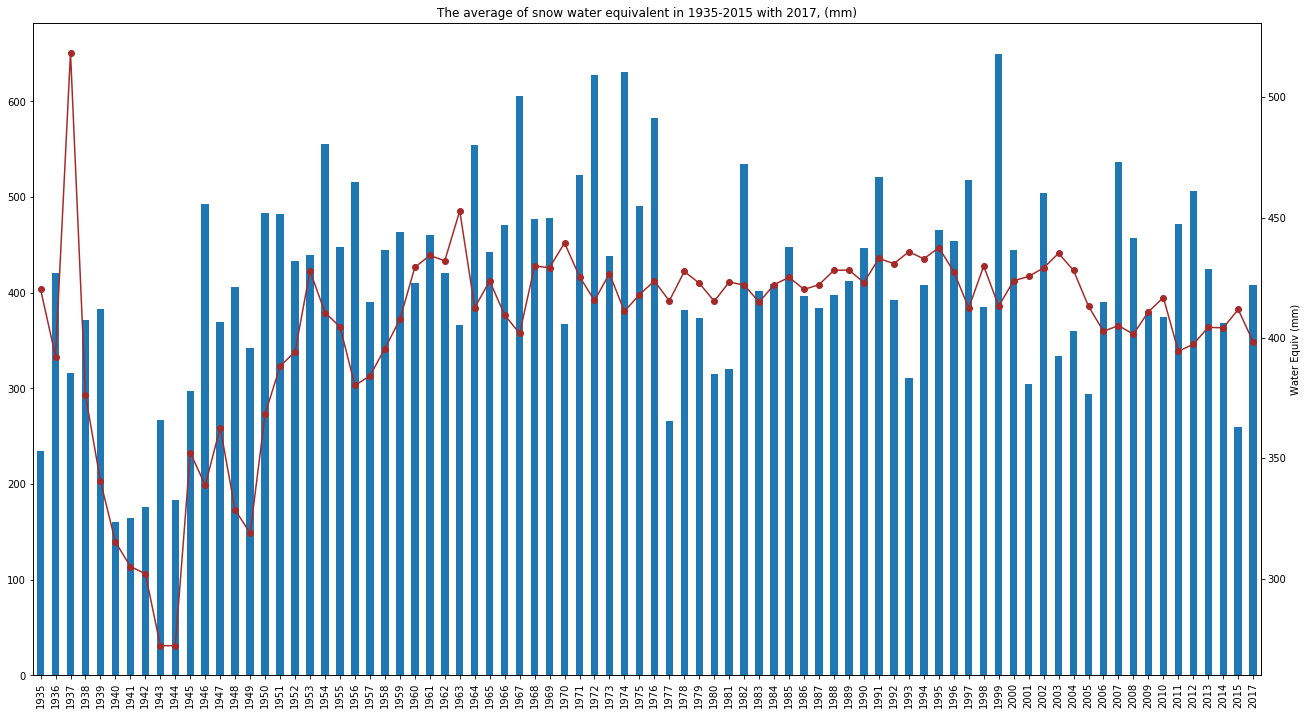

In [15]:
water_equiv = data.groupby('year')['Water_Equiv_mm'].mean()
water_equiv = water_equiv.append(pd.Series([water_equiv_2017],index=[2017]))
water_normal = data.groupby('year')['Normal_mm'].mean()
water_normal = water_normal.append(pd.Series([water_normal_2017],index=[2017]))

ax = water_equiv.plot(kind='bar',figsize=(22,12))
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), water_normal, 'brown', marker = 'o')

plt.title('The average of snow water equivalent in 1935-2015 with 2017, (mm)')
plt.xlabel('Years')
plt.ylabel('Water Equiv (mm)')
plt.show()

The blue bar is the average snow water equivalent by year, and the red line is the average normal snow water equivalent by year. It is obvious that the normal snow water equivalent is stable, and the snow water equivalent sharply fluctuates around the normal snow water equivalent. The current trend of BC snowfall is actually decreasing since 2012, while the snowfall of 2017 is slightly above the average.

To analyze the trend of the snow water equivalent, we would use the linear regression.

### First order linear regression of average of snow water equivalent in 1935-2015 with 2017

In [16]:
def first_order_linear():
    x = water_equiv.loc[1935:].index.values
    X = np.array([np.ones(82), x])
    X = np.matrix(X).T
    Y = water_equiv.loc[1935:].values
    Y = np.matrix(Y).T

    A = la.solve(X.T @ X, X.T @ Y)

    y = A[0,0] + A[1,0]*x
    plt.plot(x,y,X[:,1],Y,'r.')
    plt.xlabel('Years'), plt.ylabel('Snow Water Equivalent (mm)')
    plt.title('First order linear regression of average snow water equivalent in 1935-2015 with 2017')
    plt.show()
    return A

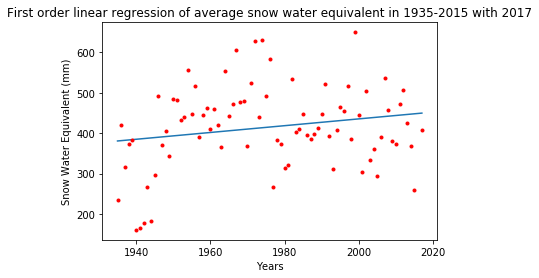

array([[ -1.24648768e+03],
       [  8.40858521e-01]])

In [17]:
first_order_linear()

The frist order linear regression graph of the average snow water equivalent measuring by year is non-well fitted. Therefore, we apply the second order linear regression.

### Second order linear regression of average of snow water equivalent in 1935-2015 with 2017

In [18]:
def second_order_linear():
    x = water_equiv.loc[1935:].index.values
    X = np.array([np.ones(82), x, x**2])
    X = np.matrix(X).T
    Y = water_equiv.loc[1935:].values
    Y = np.matrix(Y).T

    A = la.solve(X.T @ X, X.T @ Y)

    y = A[0,0] + A[1,0]*x + A[2,0]*x**2
    plt.plot(x,y,X[:,1],Y,'r.')
    plt.xlabel('Years'), plt.ylabel('Snow Water equivalent (mm)')
    plt.title('Sencond order linear regression of average snow water equivalent in 1935-2015')
    plt.show()
    return A

/opt/conda/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.0891358656597527e-21 / 1.1102230246251565e-16
  RuntimeWarning)


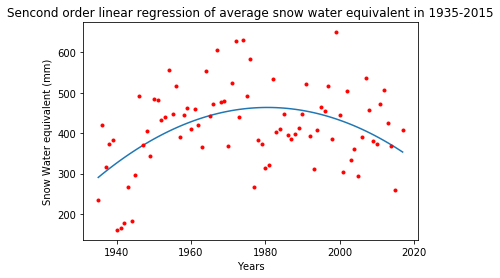

array([[ -3.26060771e+05],
       [  3.29722654e+02],
       [ -8.32380889e-02]])

In [19]:
second_order_linear()

*The red warning message might due to some closed data, Professor Patrick Walls said that it is common and can be ignored.*

The second order linear regression graph of the average snow water equivalent measuring by year shows that the trend of the snowfall in BC is actually slightly decreasing in recent year. It follows the formula: $y = -3.26060771 \times 10^5 + 3.29722654 \times 10^2 \cdot x - 8.32380889 \times 10^{-2} \cdot x^2$, where x is the year and y is the average snow water equivalent.

From historical perspective, since the early small amount of snowfall might be caused by the `NA` data of some snow courses and we need to ignore some outlier bizzards, the general trend of the snowfall is decreassing since 1970s.  

## 4. Conclusion

Although Vancouver has an unexpected huge snowfall last year, the actual trend of snowfall in the whole BC province is decreasing in recent decades. This might be caused by the global warming. On the other hand, the extreme local weather in Vancouver also reflects the climate change. The issue is getting serious year by year warning by the daily weather.